<a href="https://colab.research.google.com/github/usshaa/BK_BIRLA_DL/blob/main/03_DL/Regularization_in_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Regularization in Deep Learning**

### Learning Goals:

1. Understand **why regularization is needed** in Deep Learning.
2. Apply:

<img src="https://miro.medium.com/v2/resize:fit:1296/1*Fy1M8W2VAiDOae65Glxj6A.gif">

   * **L1 Regularization (Lasso)**
   * **L2 Regularization (Ridge)**
   * **Elastic Net Regularization (L1 + L2)**
   * **Frobenius Norm Regularization** (via L2)


## Key Idea:

Regularization adds a penalty to the loss function to prevent overfitting by **controlling model complexity** (i.e., weight magnitudes).

### Step 0: Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

### Step 1: Load and Preprocess Dataset

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Step 2: No Regularization

In [ ]:
model_base = Sequential()
model_base.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model_base.add(Dense(64, activation='relu'))
model_base.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_base.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_base = model_base.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

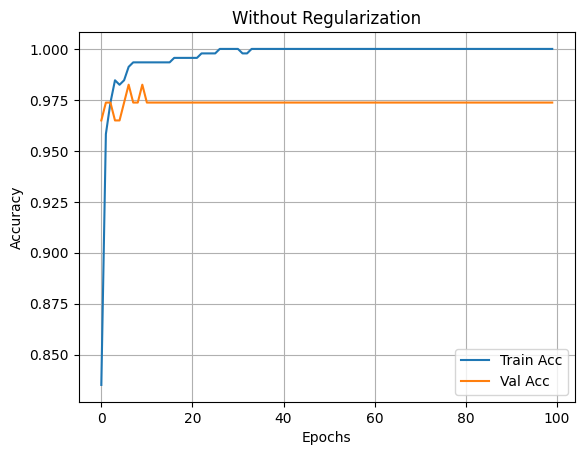

In [ ]:
# Plot
plt.plot(history_base.history['accuracy'], label='Train Acc')
plt.plot(history_base.history['val_accuracy'], label='Val Acc')
plt.title("Without Regularization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### Step 3: L2 Regularization (Ridge / Frobenius Norm)

In [ ]:
model_l2 = Sequential()
model_l2.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],),
                   kernel_regularizer=regularizers.l2(0.01)))
model_l2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_l2.add(Dense(1, activation='sigmoid'))

In [ ]:
model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_l2 = model_l2.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

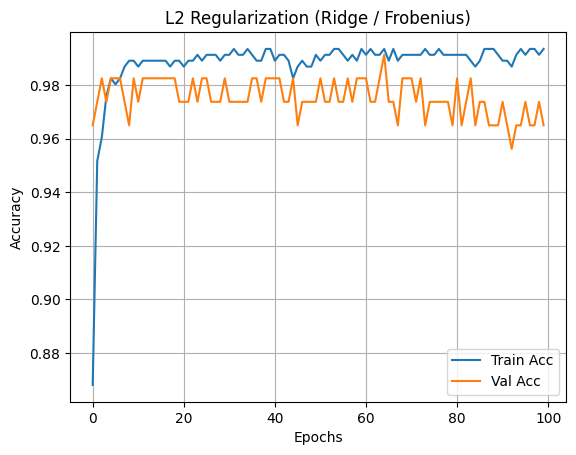

In [ ]:
plt.plot(history_l2.history['accuracy'], label='Train Acc')
plt.plot(history_l2.history['val_accuracy'], label='Val Acc')
plt.title("L2 Regularization (Ridge / Frobenius)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### Step 4: L1 Regularization (Lasso)

In [ ]:
model_l1 = Sequential()
model_l1.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],),
                   kernel_regularizer=regularizers.l1(0.01)))
model_l1.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model_l1.add(Dense(1, activation='sigmoid'))

In [ ]:
model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_l1 = model_l1.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

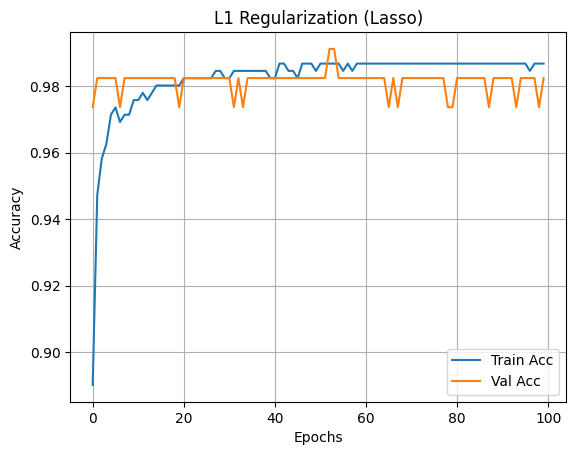

In [ ]:
plt.plot(history_l1.history['accuracy'], label='Train Acc')
plt.plot(history_l1.history['val_accuracy'], label='Val Acc')
plt.title("L1 Regularization (Lasso)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### Step 5: Elastic Net (L1 + L2 Combined)

In [ ]:
model_elastic = Sequential()
model_elastic.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],),
                        kernel_regularizer=regularizers.l1_l2(l1=0.005, l2=0.005)))
model_elastic.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.005, l2=0.005)))
model_elastic.add(Dense(1, activation='sigmoid'))

In [ ]:
model_elastic.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_elastic = model_elastic.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

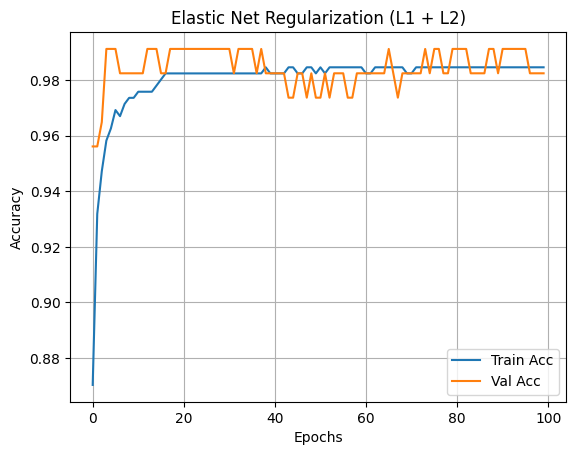

In [ ]:
plt.plot(history_elastic.history['accuracy'], label='Train Acc')
plt.plot(history_elastic.history['val_accuracy'], label='Val Acc')
plt.title("Elastic Net Regularization (L1 + L2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### Step 6: Compare Results

In [ ]:
from tabulate import tabulate

In [ ]:
summary = [
    ["No Regularization", max(history_base.history['val_accuracy'])],
    ["L2 (Ridge)", max(history_l2.history['val_accuracy'])],
    ["L1 (Lasso)", max(history_l1.history['val_accuracy'])],
    ["Elastic Net", max(history_elastic.history['val_accuracy'])]
]

In [ ]:
print(tabulate(summary, headers=["Model", "Best Validation Accuracy"], tablefmt="fancy_grid"))

╒═══════════════════╤════════════════════════════╕
│ Model             │   Best Validation Accuracy │
╞═══════════════════╪════════════════════════════╡
│ No Regularization │                   0.982456 │
├───────────────────┼────────────────────────────┤
│ L2 (Ridge)        │                   0.991228 │
├───────────────────┼────────────────────────────┤
│ L1 (Lasso)        │                   0.991228 │
├───────────────────┼────────────────────────────┤
│ Elastic Net       │                   0.991228 │
╘═══════════════════╧════════════════════════════╛


* 🔸 L2 penalizes large weights → keeps weights small (smooth decision boundary)
* 🔸 L1 encourages sparsity → sets some weights to 0 (feature selection)
* 🔸 ElasticNet balances both L1 and L2
* 🔸 Frobenius norm = L2 norm over weight matrix